<a href="https://colab.research.google.com/github/AMElashal26/Parkinsons_Regression_MachineLearning/blob/main/Parkinson's_Disease_Linear_Regression_Treatment_Machine_Learning_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
import numpy as np


In [ ]:
df_data=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

In [ ]:
df_data = df_data.drop(['name'], axis=1)
X = df_data.drop(['status'], axis=1)
y = df_data['status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:

lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.755


In [ ]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))


Accuracy of Logistic Regression without regularization: 0.898


In [ ]:

lr = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lr.fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression with L2 regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression with L2 regularization: 0.898


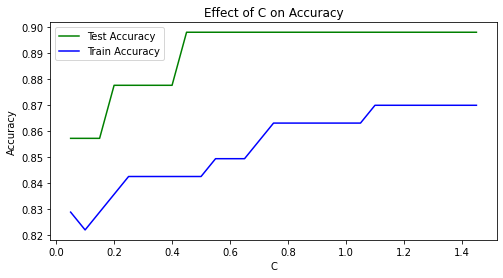

In [ ]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=10000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = pyplot.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
pyplot.show()

# c = 1.1 to 1.4 leads to consistency between the test and training set, indicating minimal overfitting
